In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes_012_health_indicators_BRFSS2015.csv'

import pandas as pd
data = pd.read_csv(file_path)

data.head()

Mounted at /content/drive


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                   'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                   'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                   'NoDocbcCost', 'DiffWalk', 'Sex']
numeric_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

#normalization of numeric_features
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [3]:
#dividing data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202944, 21), (50736, 21), (202944,), (50736,))

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse perché le etichette non sono one-hot
              metrics=['accuracy'])

#model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8420 - loss: 0.4162 - val_accuracy: 0.8444 - val_loss: 0.4022
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8424 - loss: 0.4093 - val_accuracy: 0.8447 - val_loss: 0.4022
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8447 - loss: 0.4071 - val_accuracy: 0.8466 - val_loss: 0.3987
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8435 - loss: 0.4073 - val_accuracy: 0.8440 - val_loss: 0.4027
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8450 - loss: 0.4032 - val_accuracy: 0.8464 - val_loss: 0.4012
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8472 - loss: 0.3982 - val_accuracy: 0.8436 - val_loss: 0.3999
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8449 - loss: 0.4019 - val_accuracy: 0.8459 - val_loss: 0.3999
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8432 - loss: 0

In [ ]:
#model test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8462 - loss: 0.3982
Test accuracy: 0.844469428062439


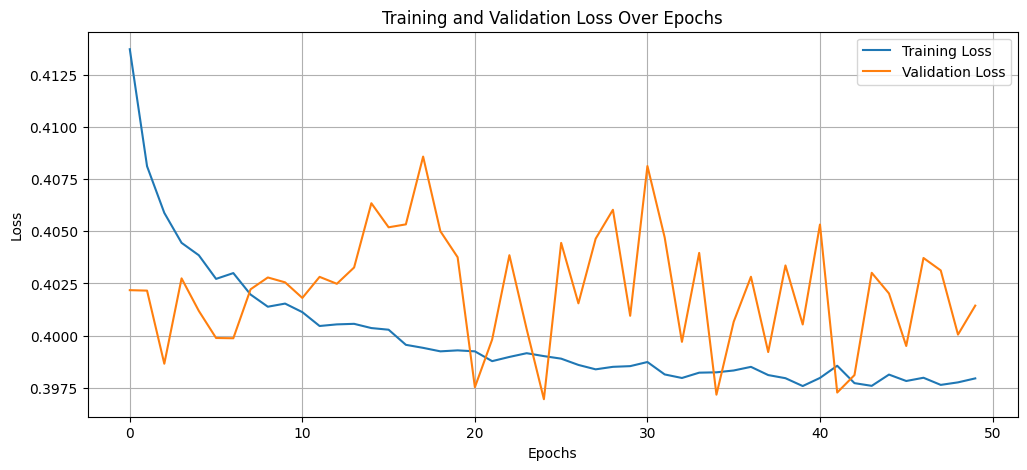

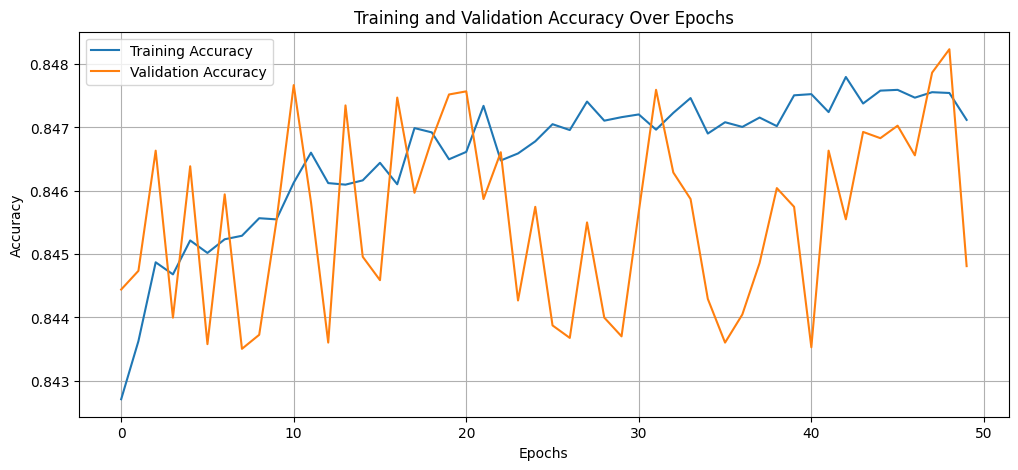

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

Increased dropout: to have greater regularization and reduce overfitting

Early Stopping: mechanism to stop training when there are no longer significant improvements

Class Weights: dictionary that assigns a specific weight to each class in the dataset, assigning greater weights to less represented classes, the influence of each class on the loss function is balanced.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse perché le etichette non sono one-hot
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
class_weights = {0: 1, 1: 5, 2: 2}
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])


Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8208 - loss: 0.8738 - val_accuracy: 0.8327 - val_loss: 0.4631
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8207 - loss: 0.7996 - val_accuracy: 0.8406 - val_loss: 0.4549
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8238 - loss: 0.7981 - val_accuracy: 0.8255 - val_loss: 0.4556
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8237 - loss: 0.7996 - val_accuracy: 0.8272 - val_loss: 0.4679
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8230 - loss: 0.7868 - val_accuracy: 0.8331 - val_loss: 0.4443
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8232 - loss: 0.7930 - val_accuracy: 0.8294 - val_loss: 0.4709
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8254 - loss: 0.7864 - val_accuracy: 0.8286 - val_loss: 0.4739
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8235 - loss: 0.

In [8]:
#model test set
y_test = y_test.astype(int)
y_test = np.squeeze(y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8358 - loss: 0.4403
Test accuracy: 0.8343188166618347


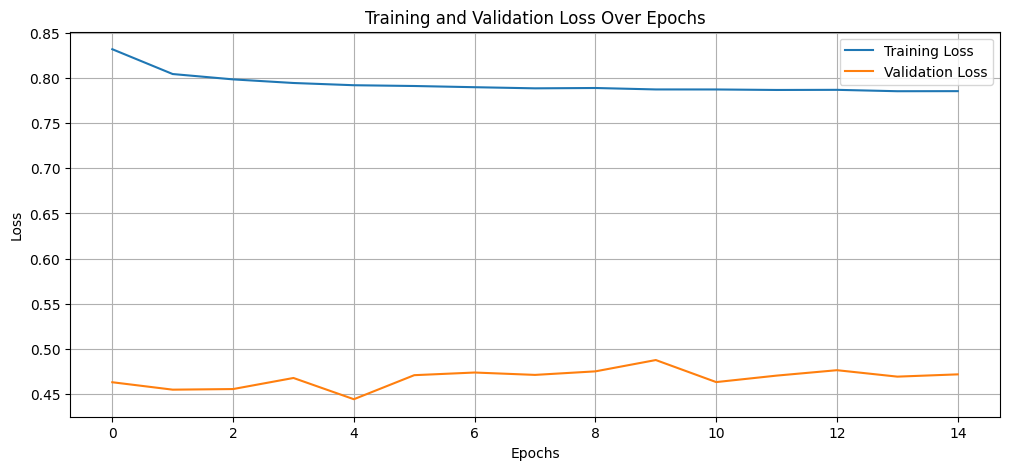

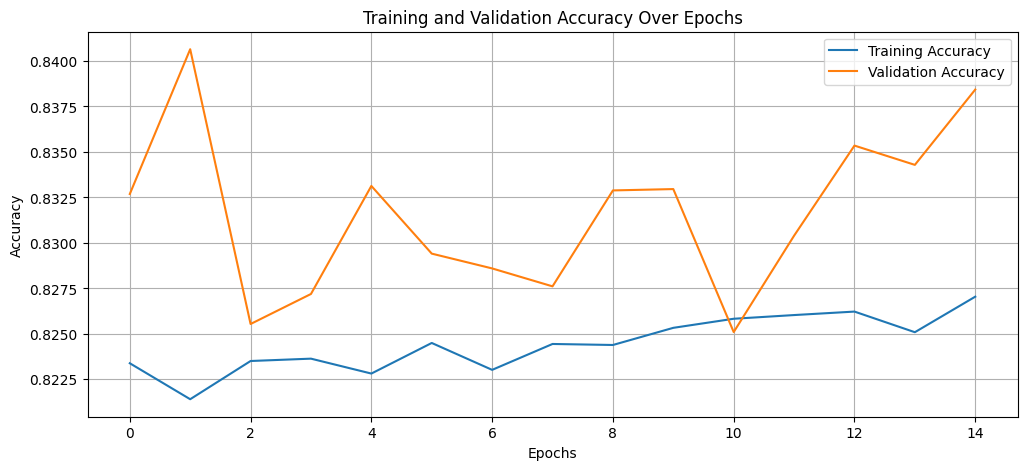

In [9]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

We have incresed a little the accuracy

Now we try to increase the number of hidden layer of the nn

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(16, activation='relu'),
    BatchNormalization(),

    Dense(3, activation='softmax')
])

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
class_weights = {0: 1, 1: 5, 2: 2}

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.7718 - loss: 0.9400 - val_accuracy: 0.8192 - val_loss: 0.4701
Epoch 2/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8248 - loss: 0.8126 - val_accuracy: 0.8243 - val_loss: 0.4670
Epoch 3/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.8223 - loss: 0.8022 - val_accuracy: 0.8210 - val_loss: 0.4647
Epoch 4/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8211 - loss: 0.8045 - val_accuracy: 0.8197 - val_loss: 0.4538
Epoch 5/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8256 - loss: 0.7895 - val_accuracy: 0.8204 - val_loss: 0.4586
Epoch 6/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8227 - loss: 0.7914 - val_accuracy: 0.8336 - val_loss: 0.4545
Epoch 7/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8257 - loss: 0.7955 - val_accuracy: 0.8261 - val_loss: 0.4535
Epoch 8/50
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8265 - loss: 0

In [ ]:
#model test set
y_test = y_test.astype(int)
y_test = np.squeeze(y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8384 - loss: 0.4334
Test accuracy: 0.8373344540596008


Using 2 more hidden levels in the nn doesn't increase significatly the accuracy of the model